In [13]:
import os
import sys
import numpy as np
import json
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes

%matplotlib inline

In [14]:
methods = ['No_deconv', 'FPFS',
           'Richard-Lucy(10)', 'Richard-Lucy(20)', 
           'Richard-Lucy(30)', 'Richard-Lucy(50)', 'Richard-Lucy(100)',
           'Unrolled_ADMM(1)', 'Unrolled_ADMM(2)', 'Unrolled_ADMM(4)', 'Unrolled_ADMM(8)']

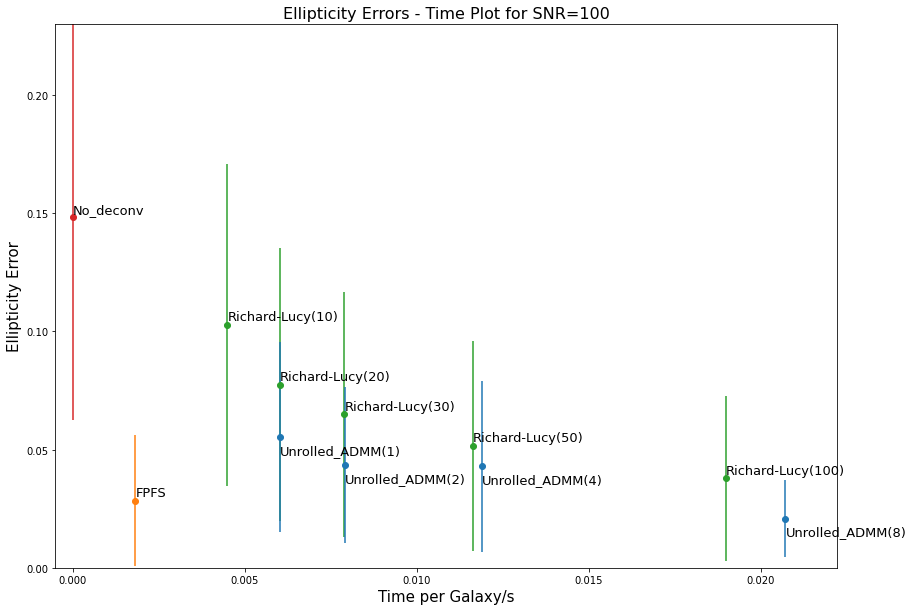

In [21]:
snr = 100

fig, ax1 = plt.subplots(figsize=(14,10))
shear_err_1, shear_err_2, g_errs, g_stds, ts = [], [], [], [], []
for method in methods:
    results_file = os.path.join('results', method, f'results.json')
    with open(results_file, 'r') as f:
        results = json.load(f)
    if method == 'No_deconv':
        gt_shear = np.array(results[str(snr)]['gt_shear'])
    total_time, n_gal = results['time']
    rec_err = np.abs(np.array(results[str(snr)]['rec_shear']) - gt_shear)
    ts.append(total_time/n_gal)
    g_errs.append(np.mean(rec_err[:,2]))
    g_stds.append(np.std(rec_err[:,2]))

for t, g_err, g_std, method in zip(ts, g_errs, g_stds, methods):
    color = 'tab:blue' if 'ADMM' in method else ('tab:green' if 'Richard-Lucy' in method else ('tab:orange' if method=='FPFS' else 'tab:red'))
    bias = -0.007 if 'ADMM' in method else 0.002
    plt.errorbar(t, g_err, yerr=g_std, marker='o', color=color)
    plt.text(t, g_err+bias, method, fontsize=13)
    
plt.xlim([-0.0005, 0.0222])
plt.ylim([0., 0.23])
# plt.yscale('log')
plt.ylabel('Ellipticity Error', fontsize=15)
plt.xlabel('Time per Galaxy/s', fontsize=15)
plt.title(f'Ellipticity Errors - Time Plot for SNR={snr}', fontsize=16)
plt.savefig(os.path.join('figures', f'time_err_{snr}.jpg'), bbox_inches='tight')
plt.show()

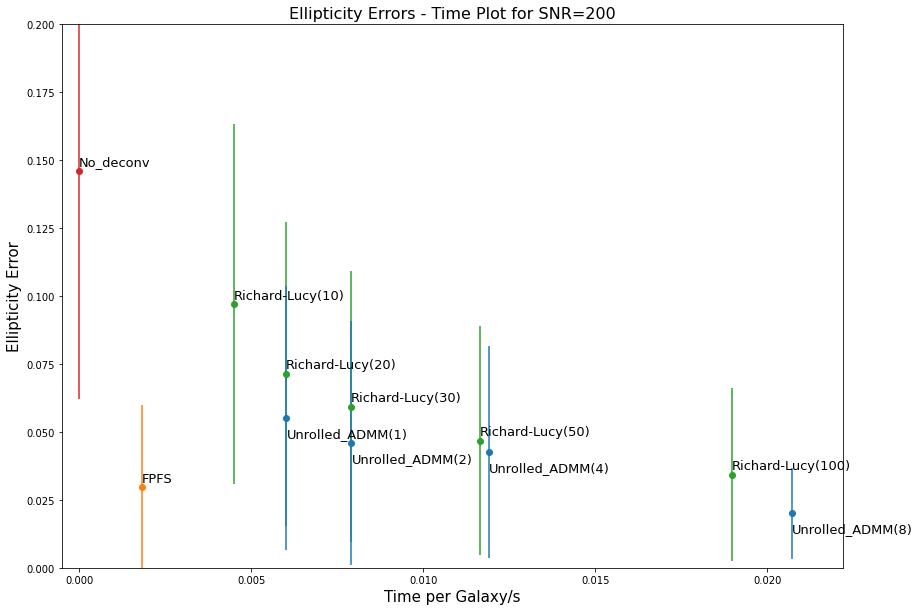

In [20]:
snr = 200

fig, ax1 = plt.subplots(figsize=(14,10))
shear_err_1, shear_err_2, g_errs, g_stds, ts = [], [], [], [], []
for method in methods:
    results_file = os.path.join('results', method, f'results.json')
    with open(results_file, 'r') as f:
        results = json.load(f)
    if method == 'No_deconv':
        gt_shear = np.array(results[str(snr)]['gt_shear'])
    total_time, n_gal = results['time']
    rec_err = np.abs(np.array(results[str(snr)]['rec_shear']) - gt_shear)
    ts.append(total_time/n_gal)
    g_errs.append(np.mean(rec_err[:,2]))
    g_stds.append(np.std(rec_err[:,2]))

for t, g_err, g_std, method in zip(ts, g_errs, g_stds, methods):
    color = 'tab:blue' if 'ADMM' in method else ('tab:green' if 'Richard-Lucy' in method else ('tab:orange' if method=='FPFS' else 'tab:red'))
    bias = -0.007 if 'ADMM' in method else 0.002
    plt.errorbar(t, g_err, yerr=g_std, marker='o', color=color)
    plt.text(t, g_err+bias, method, fontsize=13)
    
plt.xlim([-0.0005, 0.0222])
plt.ylim([0., 0.20])
# plt.yscale('log')
plt.ylabel('Ellipticity Error', fontsize=15)
plt.xlabel('Time per Galaxy/s', fontsize=15)
plt.title(f'Ellipticity Errors - Time Plot for SNR={snr}', fontsize=16)
plt.savefig(os.path.join('figures', f'time_err_{snr}.jpg'), bbox_inches='tight')
plt.show()

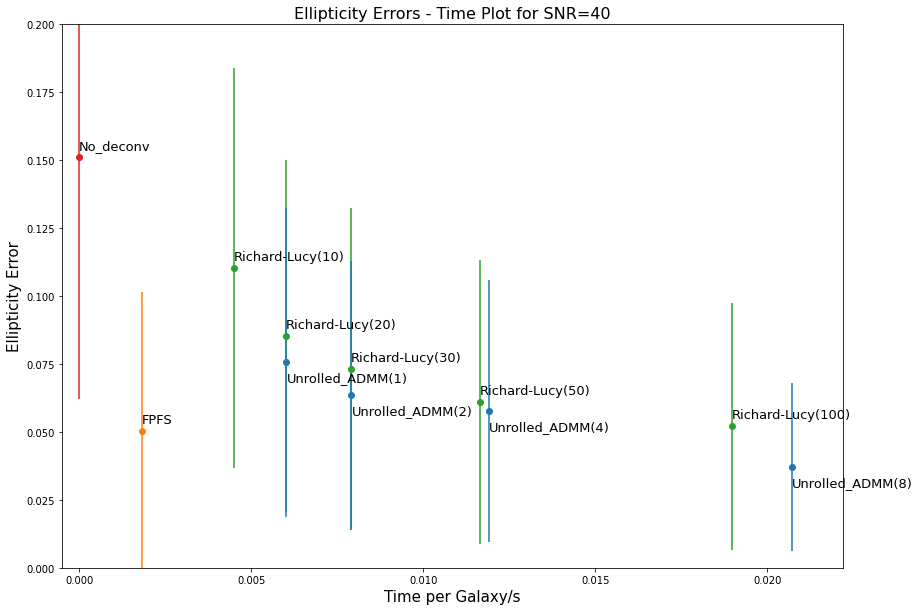

In [19]:
snr = 40

fig, ax1 = plt.subplots(figsize=(14,10))
shear_err_1, shear_err_2, g_errs, g_stds, ts = [], [], [], [], []
for method in methods:
    results_file = os.path.join('results', method, f'results.json')
    with open(results_file, 'r') as f:
        results = json.load(f)
    if method == 'No_deconv':
        gt_shear = np.array(results[str(snr)]['gt_shear'])
    total_time, n_gal = results['time']
    rec_err = np.abs(np.array(results[str(snr)]['rec_shear']) - gt_shear)
    ts.append(total_time/n_gal)
    g_errs.append(np.mean(rec_err[:,2]))
    g_stds.append(np.std(rec_err[:,2]))

for t, g_err, g_std, method in zip(ts, g_errs, g_stds, methods):
    color = 'tab:blue' if 'ADMM' in method else ('tab:green' if 'Richard-Lucy' in method else ('tab:orange' if method=='FPFS' else 'tab:red'))
    bias = -0.007 if 'ADMM' in method else 0.003
    plt.errorbar(t, g_err, yerr=g_std, marker='o', color=color)
    plt.text(t, g_err+bias, method, fontsize=13)
    
plt.xlim([-0.0005, 0.0222])
plt.ylim([0, 0.2])
# plt.yscale('log')
plt.ylabel('Ellipticity Error', fontsize=15)
plt.xlabel('Time per Galaxy/s', fontsize=15)
plt.title(f'Ellipticity Errors - Time Plot for SNR={snr}', fontsize=16)
plt.savefig(os.path.join('figures', f'time_err_{snr}.jpg'), bbox_inches='tight')
plt.show()

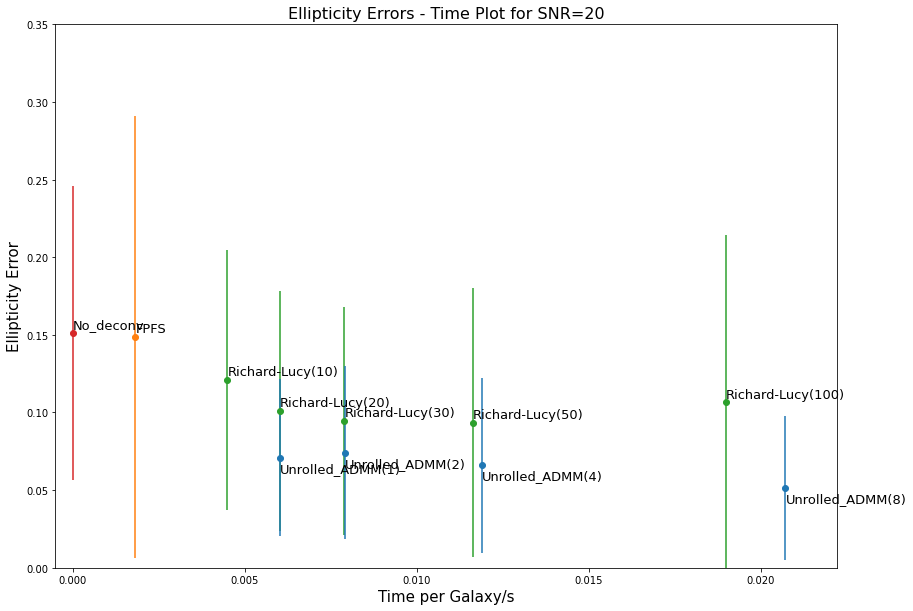

In [18]:
snr = 20

fig, ax1 = plt.subplots(figsize=(14,10))
shear_err_1, shear_err_2, g_errs, g_stds, ts = [], [], [], [], []
for method in methods:
    results_file = os.path.join('results', method, f'results.json')
    with open(results_file, 'r') as f:
        results = json.load(f)
    if method == 'No_deconv':
        gt_shear = np.array(results[str(snr)]['gt_shear'])
    total_time, n_gal = results['time']
    rec_err = np.abs(np.array(results[str(snr)]['rec_shear']) - gt_shear)
    ts.append(total_time/n_gal)
    g_errs.append(np.mean(rec_err[:,2]))
    g_stds.append(np.std(rec_err[:,2]))

for t, g_err, g_std, method in zip(ts, g_errs, g_stds, methods):
    color = 'tab:blue' if 'ADMM' in method else ('tab:green' if 'Richard-Lucy' in method else ('tab:orange' if method=='FPFS' else 'tab:red'))
    bias = -0.009 if 'ADMM' in method else 0.003
    plt.errorbar(t, g_err, yerr=g_std, marker='o', color=color)
    plt.text(t, g_err+bias, method, fontsize=13)
    
plt.xlim([-0.0005, 0.0222])
plt.ylim([0, 0.35])
# plt.yscale('log')
plt.ylabel('Ellipticity Error', fontsize=15)
plt.xlabel('Time per Galaxy/s', fontsize=15)
plt.title(f'Ellipticity Errors - Time Plot for SNR={snr}', fontsize=16)
plt.savefig(os.path.join('figures', f'time_err_{snr}.jpg'), bbox_inches='tight')
plt.show()

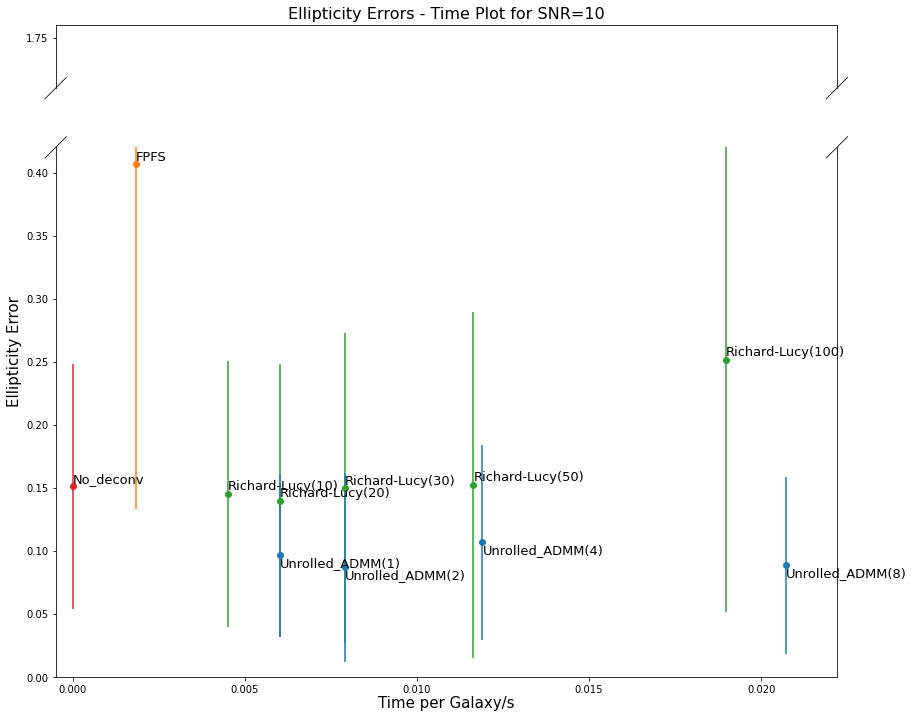

In [16]:
snr = 10

plt.figure(figsize=(14,12))
bax = brokenaxes(ylims=((0,0.42), (1.71,1.76)), hspace=0.2, despine=False)

shear_err_1, shear_err_2, g_errs, g_stds, ts = [], [], [], [], []
for method in methods:
    results_file = os.path.join('results', method, f'results.json')
    with open(results_file, 'r') as f:
        results = json.load(f)
    if method == 'No_deconv':
        gt_shear = np.array(results[str(snr)]['gt_shear'])
    total_time, n_gal = results['time']
    rec_err = np.abs(np.array(results[str(snr)]['rec_shear']) - gt_shear)
    ts.append(total_time/n_gal)
    g_errs.append(np.mean(rec_err[:,2]))
    g_stds.append(np.std(rec_err[:,2]))

for t, g_err, g_std, method in zip(ts, g_errs, g_stds, methods):
    color = 'tab:blue' if 'ADMM' in method else ('tab:green' if 'Richard-Lucy' in method else ('tab:orange' if method=='FPFS' else 'tab:red'))
    bias = -0.009 if 'ADMM' in method else 0.003
    bax.errorbar(t, g_err, yerr=g_std, marker='o', color=color)
    bax.text(t, g_err+bias, method, fontsize=13)
    
bax.set_xlim([-0.0005, 0.0222])
# plt.ylim([0, 4])
# plt.yscale('log')
bax.set_ylabel('Ellipticity Error', fontsize=15)
bax.set_xlabel('Time per Galaxy/s', fontsize=15)
plt.title(f'Ellipticity Errors - Time Plot for SNR={snr}', fontsize=16)
plt.savefig(os.path.join('figures', f'time_err_{snr}.jpg'), bbox_inches='tight')
plt.show()